In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
data=pd.read_csv("athlete.csv")

In [9]:
print(data)

    Age  Training_Hours_Per_Week  Performance_Score  \
0    25                       10                 85   
1    30                       15                 92   
2    35                        8                 78   
3    28                       12                 89   
4    22                       20                 75   
5    31                        9                 88   
6    27                       18                 90   
7    29                       11                 87   
8    26                       14                 86   
9    24                       16                 80   
10   32                       13                 91   
11   33                       10                 84   
12   34                        9                 85   
13   30                       15                 92   
14   25                        8                 78   
15   28                       12                 89   
16   22                       20                 75   
17   31   

In [11]:
print(data['Age'],data['Training_Hours_Per_Week'])

0     25
1     30
2     35
3     28
4     22
5     31
6     27
7     29
8     26
9     24
10    32
11    33
12    34
13    30
14    25
15    28
16    22
17    31
18    27
19    29
20    24
21    33
22    23
23    34
24    28
25    27
26    29
27    26
28    24
29    33
30    23
Name: Age, dtype: int64 0     10
1     15
2      8
3     12
4     20
5      9
6     18
7     11
8     14
9     16
10    13
11    10
12     9
13    15
14     8
15    12
16    20
17     9
18    18
19    11
20    16
21    10
22    19
23     9
24    12
25    18
26    11
27    14
28    16
29    10
30    19
Name: Training_Hours_Per_Week, dtype: int64


In [12]:
data.head()

,Age,Training_Hours_Per_Week,Performance_Score,Preference_For_Vegetables,Preference_For_Protein,Gender,Calories_Required,Nutritious_Meal,Height,Weight,Price_in_Kenya_Shillings,Training_Complexity,Training_Complexity_Range,Unnamed: 13,Unnamed: 14
0,25,10,85,4,3,Male,2000,Ugali with Beef and Spinach,160 cm,70 kg,Ksh 300,Intermediate,6,NaN,NaN
1,30,15,92,5,4,Female,2200,Grilled Chicken with Quinoa and Broccoli,165 cm,65 kg,Ksh 350,Advanced,8,NaN,NaN
2,35,8,78,3,4,Male,2400,Fish Tacos with Avocado and Mixed Greens,175 cm,75 kg,Ksh 400,Intermediate,6,NaN,NaN
3,28,12,89,4,3,Female,2100,Baked Salmon with Brown Rice and Asparagus,162 cm,60 kg,Ksh 320,Intermediate,6,NaN,NaN
4,22,20,75,3,2,Male,2500,Tofu Stir-Fry with Bok Choy and Brown Rice,170 cm,68 kg,Ksh 380,Advanced,8,NaN,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        31 non-null     int64  
 1   Training_Hours_Per_Week    31 non-null     int64  
 2   Performance_Score          31 non-null     int64  
 3   Preference_For_Vegetables  31 non-null     int64  
 4   Preference_For_Protein     31 non-null     int64  
 5   Gender                     31 non-null     object 
 6   Calories_Required          31 non-null     int64  
 7   Nutritious_Meal            31 non-null     object 
 8   Height                     31 non-null     object 
 9   Weight                     31 non-null     object 
 10  Price_in_Kenya_Shillings   31 non-null     object 
 11  Training_Complexity        31 non-null     object 
 12  Training_Complexity_Range  31 non-null     int64  
 13  Unnamed: 13                0 non-null      float64
 

In [14]:
data.isnull().sum()

Age                           0
Training_Hours_Per_Week       0
Performance_Score             0
Preference_For_Vegetables     0
Preference_For_Protein        0
Gender                        0
Calories_Required             0
Nutritious_Meal               0
Height                        0
Weight                        0
Price_in_Kenya_Shillings      0
Training_Complexity           0
Training_Complexity_Range     0
Unnamed: 13                  31
Unnamed: 14                  31
dtype: int64

In [15]:
data.describe()

,Age,Training_Hours_Per_Week,Performance_Score,Preference_For_Vegetables,Preference_For_Protein,Calories_Required,Training_Complexity_Range,Unnamed: 13,Unnamed: 14
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,0.0,0.0
mean,28.129032,13.290323,84.903226,3.612903,3.096774,2232.258065,6.387097,NaN,NaN
std,3.827462,3.848753,4.955501,0.667204,0.746317,138.171625,0.803219,NaN,NaN
min,22.000000,8.000000,75.000000,3.000000,2.000000,2000.000000,6.000000,NaN,NaN
25%,25.000000,10.000000,80.000000,3.000000,3.000000,2150.000000,6.000000,NaN,NaN
50%,28.000000,12.000000,86.000000,4.000000,3.000000,2200.000000,6.000000,NaN,NaN
75%,31.000000,16.000000,89.000000,4.000000,4.000000,2325.000000,6.000000,NaN,NaN
max,35.000000,20.000000,92.000000,5.000000,4.000000,2500.000000,8.000000,NaN,NaN


In [20]:
data.drop(['Unnamed: 13'], axis=1)

,Age,Training_Hours_Per_Week,Performance_Score,Preference_For_Vegetables,Preference_For_Protein,Gender,Calories_Required,Nutritious_Meal,Height,Weight,Price_in_Kenya_Shillings,Training_Complexity,Training_Complexity_Range,Unnamed: 14
0,25,10,85,4,3,Male,2000,Ugali with Beef and Spinach,160 cm,70 kg,Ksh 300,Intermediate,6,NaN
1,30,15,92,5,4,Female,2200,Grilled Chicken with Quinoa and Broccoli,165 cm,65 kg,Ksh 350,Advanced,8,NaN
2,35,8,78,3,4,Male,2400,Fish Tacos with Avocado and Mixed Greens,175 cm,75 kg,Ksh 400,Intermediate,6,NaN
3,28,12,89,4,3,Female,2100,Baked Salmon with Brown Rice and Asparagus,162 cm,60 kg,Ksh 320,Intermediate,6,NaN
4,22,20,75,3,2,Male,2500,Tofu Stir-Fry with Bok Choy and Brown Rice,170 cm,68 kg,Ksh 380,Advanced,8,NaN
5,31,9,88,4,3,Female,2050,Chickpea Salad with Kale and Lemon Vinaigrette,163 cm,63 kg,Ksh 330,Intermediate,6,NaN
6,27,18,90,4,3,Male,2300,Turkey and Vegetable Stir-Fry with Quinoa,168 cm,72 kg,Ksh 390,Advanced,8,NaN
7,29,11,87,3,4,Female,2150,Grilled Portobello Mushrooms with Couscous and...,166 cm,67 kg,Ksh 360,Intermediate,6,NaN
8,26,14,86,4,3,Male,2250,Lentil Soup with Whole Wheat Bread and Mixed ...,164 cm,66 kg,Ksh 340,Intermediate,6,NaN
9,24,16,80,3,2,Female,2350,Spinach and Feta Stuffed Chicken Breast with S...,161 cm,59 kg,Ksh 310,Intermediate,6,NaN


In [32]:
data_athlete=data.drop(['Unnamed: 13'],['Unnamed: 14'], axis=1)

C:\Users\GATHUITAPIUS\AppData\Local\Temp\ipykernel_3636\274272045.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_athlete=data.drop(['Unnamed: 13'],['Unnamed: 14'], axis=1)


TypeError: DataFrame.drop() got multiple values for argument 'axis'

In [30]:
print(data_athlete)

    Age  Training_Hours_Per_Week  Performance_Score  \
0    25                       10                 85   
1    30                       15                 92   
2    35                        8                 78   
3    28                       12                 89   
4    22                       20                 75   
5    31                        9                 88   
6    27                       18                 90   
7    29                       11                 87   
8    26                       14                 86   
9    24                       16                 80   
10   32                       13                 91   
11   33                       10                 84   
12   34                        9                 85   
13   30                       15                 92   
14   25                        8                 78   
15   28                       12                 89   
16   22                       20                 75   
17   31   

In [34]:
df = pd.DataFrame(data)

In [44]:
new_data = df.drop("Unnamed: 13", axis="columns")

In [120]:
new_data2 = df.drop(["Unnamed: 13","Unnamed: 14"], axis="columns")

In [121]:
print(new_data2)

    Age  Training_Hours_Per_Week  Performance_Score  \
0    25                       10                 85   
1    30                       15                 92   
2    35                        8                 78   
3    28                       12                 89   
4    22                       20                 75   
5    31                        9                 88   
6    27                       18                 90   
7    29                       11                 87   
8    26                       14                 86   
9    24                       16                 80   
10   32                       13                 91   
11   33                       10                 84   
12   34                        9                 85   
13   30                       15                 92   
14   25                        8                 78   
15   28                       12                 89   
16   22                       20                 75   
17   31   

In [122]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        31 non-null     int64 
 1   Training_Hours_Per_Week    31 non-null     int64 
 2   Performance_Score          31 non-null     int64 
 3   Preference_For_Vegetables  31 non-null     int64 
 4   Preference_For_Protein     31 non-null     int64 
 5   Gender                     31 non-null     object
 6   Calories_Required          31 non-null     int64 
 7   Nutritious_Meal            31 non-null     object
 8   Height                     31 non-null     object
 9   Weight                     31 non-null     object
 10  Price_in_Kenya_Shillings   31 non-null     object
 11  Training_Complexity        31 non-null     object
 12  Training_Complexity_Range  31 non-null     int64 
dtypes: int64(7), object(6)
memory usage: 3.3+ KB


In [125]:
new_data2.isnull().sum()

Age                          0
Training_Hours_Per_Week      0
Performance_Score            0
Preference_For_Vegetables    0
Preference_For_Protein       0
Gender                       0
Calories_Required            0
Nutritious_Meal              0
Height                       0
Weight                       0
Price_in_Kenya_Shillings     0
Training_Complexity          0
Training_Complexity_Range    0
dtype: int64

In [54]:
new_data2.describe()

,Age,Training_Hours_Per_Week,Performance_Score,Preference_For_Vegetables,Preference_For_Protein,Calories_Required,Training_Complexity_Range
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,28.129032,13.290323,84.903226,3.612903,3.096774,2232.258065,6.387097
std,3.827462,3.848753,4.955501,0.667204,0.746317,138.171625,0.803219
min,22.000000,8.000000,75.000000,3.000000,2.000000,2000.000000,6.000000
25%,25.000000,10.000000,80.000000,3.000000,3.000000,2150.000000,6.000000
50%,28.000000,12.000000,86.000000,4.000000,3.000000,2200.000000,6.000000
75%,31.000000,16.000000,89.000000,4.000000,4.000000,2325.000000,6.000000
max,35.000000,20.000000,92.000000,5.000000,4.000000,2500.000000,8.000000


In [55]:
new_data2.shape

(31, 13)

In [56]:
new_data1.columns

Index(['Age', 'Training_Hours_Per_Week', 'Performance_Score',
       'Preference_For_Vegetables', 'Preference_For_Protein', 'Gender',
       'Calories_Required', 'Nutritious_Meal', 'Height', 'Weight',
       'Price_in_Kenya_Shillings', 'Training_Complexity',
       'Training_Complexity_Range'],
      dtype='object')

In [124]:
print(new_data2['Calories_Required'])

0     2000
1     2200
2     2400
3     2100
4     2500
5     2050
6     2300
7     2150
8     2250
9     2350
10    2150
11    2100
12    2050
13    2200
14    2300
15    2400
16    2500
17    2050
18    2150
19    2250
20    2300
21    2400
22    2150
23    2050
24    2300
25    2150
26    2300
27    2200
28    2400
29    2150
30    2350
Name: Calories_Required, dtype: int64


In [123]:
new_data2.columns

Index(['Age', 'Training_Hours_Per_Week', 'Performance_Score',
       'Preference_For_Vegetables', 'Preference_For_Protein', 'Gender',
       'Calories_Required', 'Nutritious_Meal', 'Height', 'Weight',
       'Price_in_Kenya_Shillings', 'Training_Complexity',
       'Training_Complexity_Range'],
      dtype='object')

In [60]:
from matplotlib import style

In [95]:
Calories_Required = new_data1['Calories_Required']
Age = new_data1['Age']
Training_Hours_Per_Week = new_data1['Training_Hours_Per_Week']
Performance_Score = new_data1['Performance_Score']
Height = new_data1['Height']
Weight = new_data1['Weight']
Price_in_Kenya_Shillings = new_data1['Price_in_Kenya_Shillings']
Training_Complexity_Range = new_data1['Training_Complexity_Range']

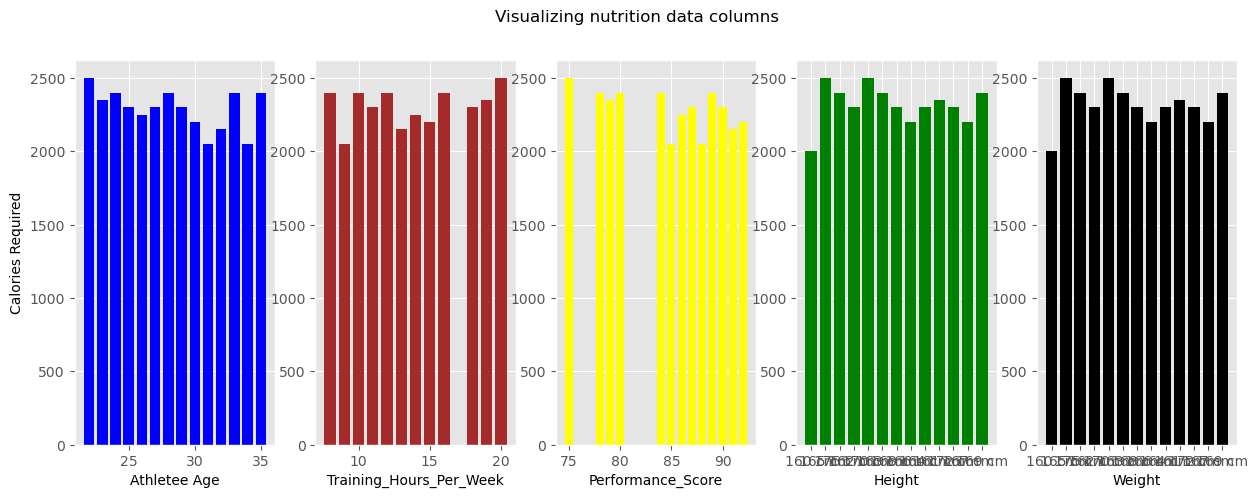

In [86]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing nutrition data columns')
plt.subplot(1,5,1)
plt.bar(Age,Calories_Required, color='blue')
plt.xlabel("Athletee Age")
plt.ylabel("Calories Required")
plt.subplot(1,5,2)
plt.bar(Training_Hours_Per_Week, Calories_Required, color='brown')
plt.xlabel("Training_Hours_Per_Week")
plt.subplot(1,5,3)
plt.bar(Performance_Score, Calories_Required, color='yellow')
plt.xlabel("Performance_Score")
plt.subplot(1,5,4)
plt.bar(Height, Calories_Required, color='green')
plt.xlabel("Height")
plt.subplot(1,5,5)
plt.bar(Height, Calories_Required, color='black')
plt.xlabel("Weight")
plt.show()


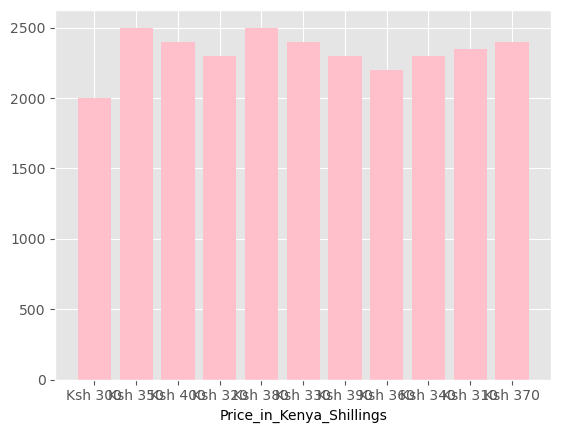

In [98]:
plt.subplot(1,1,1)
plt.bar(Price_in_Kenya_Shillings, Calories_Required, color='pink')
plt.xlabel("Price_in_Kenya_Shillings")
plt.show()

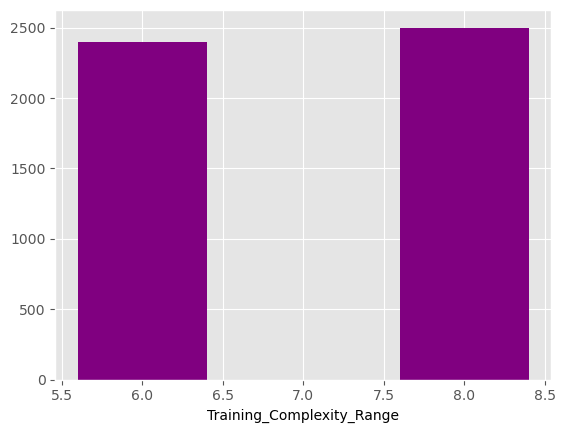

In [118]:
plt.subplot(1,1,1)
plt.bar(Training_Complexity_Range, Calories_Required, color='purple')
plt.xlabel("Training_Complexity_Range")
plt.show()

In [119]:
plt.figure(figsize=(20,15))
sns.heatmap(new_data1.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

TypeError: Series.corr() missing 1 required positional argument: 'other'

<Figure size 2000x1500 with 0 Axes>

<Axes: title={'center': 'Correlation between the columns'}, xlabel='Training_Complexity_Range', ylabel='Calories_Required'>

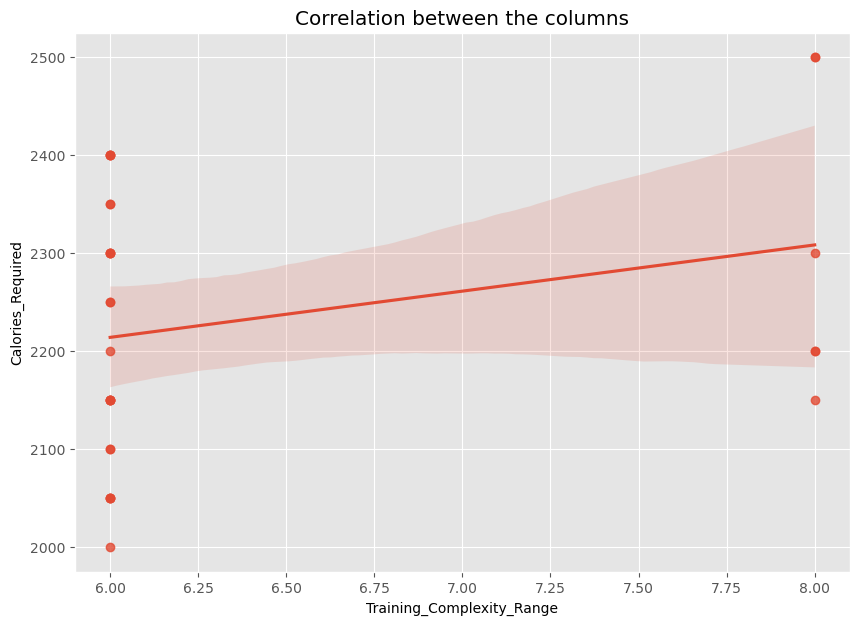

In [107]:
plt.figure(figsize=(10,7))
plt.title('Correlation between the columns')
sns.regplot(x='Training_Complexity_Range', y='Calories_Required', data=new_data1)

KeyError: 'Age'

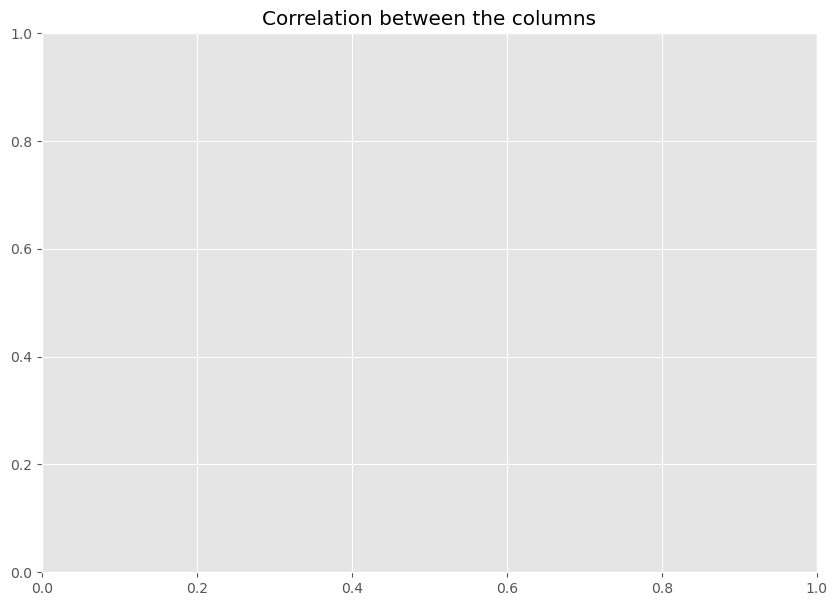

In [116]:
plt.figure(figsize=(10,7))
plt.title('Correlation between the columns')
sns.regplot(x='Age', y='Calories_Required', data=new_data1)

In [115]:
new_data1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 31 entries, 0 to 30
Series name: Price_in_Kenya_Shillings
Non-Null Count  Dtype 
--------------  ----- 
31 non-null     object
dtypes: object(1)
memory usage: 376.0+ bytes


In [131]:
new_data2['Price_in_Kenya_Shillings']=new_data2['Price_in_Kenya_Shillings'].str.split(' ').str.get(1)

In [132]:
print(new_data2)

    Age  Training_Hours_Per_Week  Performance_Score  \
0    25                       10                 85   
1    30                       15                 92   
2    35                        8                 78   
3    28                       12                 89   
4    22                       20                 75   
5    31                        9                 88   
6    27                       18                 90   
7    29                       11                 87   
8    26                       14                 86   
9    24                       16                 80   
10   32                       13                 91   
11   33                       10                 84   
12   34                        9                 85   
13   30                       15                 92   
14   25                        8                 78   
15   28                       12                 89   
16   22                       20                 75   
17   31   

In [134]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        31 non-null     int64 
 1   Training_Hours_Per_Week    31 non-null     int64 
 2   Performance_Score          31 non-null     int64 
 3   Preference_For_Vegetables  31 non-null     int64 
 4   Preference_For_Protein     31 non-null     int64 
 5   Gender                     31 non-null     object
 6   Calories_Required          31 non-null     int64 
 7   Nutritious_Meal            31 non-null     object
 8   Height                     31 non-null     object
 9   Weight                     31 non-null     object
 10  Price_in_Kenya_Shillings   31 non-null     object
 11  Training_Complexity        31 non-null     object
 12  Training_Complexity_Range  31 non-null     int64 
dtypes: int64(7), object(6)
memory usage: 3.3+ KB


In [135]:
new_data2['Price_in_Kenya_Shillings']=new_data2['Price_in_Kenya_Shillings'].astype(int)

In [136]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        31 non-null     int64 
 1   Training_Hours_Per_Week    31 non-null     int64 
 2   Performance_Score          31 non-null     int64 
 3   Preference_For_Vegetables  31 non-null     int64 
 4   Preference_For_Protein     31 non-null     int64 
 5   Gender                     31 non-null     object
 6   Calories_Required          31 non-null     int64 
 7   Nutritious_Meal            31 non-null     object
 8   Height                     31 non-null     object
 9   Weight                     31 non-null     object
 10  Price_in_Kenya_Shillings   31 non-null     int32 
 11  Training_Complexity        31 non-null     object
 12  Training_Complexity_Range  31 non-null     int64 
dtypes: int32(1), int64(7), object(5)
memory usage: 3.2+ KB


In [142]:
new_data2['Height']=new_data2['Height'].str.split(' ').str.get(0)

In [147]:
new_data2['Weight']=new_data2['Weight'].str.split(' ').str.get(0)

In [148]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        31 non-null     int64 
 1   Training_Hours_Per_Week    31 non-null     int64 
 2   Performance_Score          31 non-null     int64 
 3   Preference_For_Vegetables  31 non-null     int64 
 4   Preference_For_Protein     31 non-null     int64 
 5   Gender                     31 non-null     object
 6   Calories_Required          31 non-null     int64 
 7   Nutritious_Meal            31 non-null     object
 8   Height                     31 non-null     object
 9   Weight                     31 non-null     object
 10  Price_in_Kenya_Shillings   31 non-null     int32 
 11  Training_Complexity        31 non-null     object
 12  Training_Complexity_Range  31 non-null     int64 
dtypes: int32(1), int64(7), object(5)
memory usage: 3.2+ KB


In [149]:
new_data2['Weight']=new_data2['Weight'].astype(int)
new_data2['Height']=new_data2['Height'].astype(int)

In [150]:
new_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        31 non-null     int64 
 1   Training_Hours_Per_Week    31 non-null     int64 
 2   Performance_Score          31 non-null     int64 
 3   Preference_For_Vegetables  31 non-null     int64 
 4   Preference_For_Protein     31 non-null     int64 
 5   Gender                     31 non-null     object
 6   Calories_Required          31 non-null     int64 
 7   Nutritious_Meal            31 non-null     object
 8   Height                     31 non-null     int32 
 9   Weight                     31 non-null     int32 
 10  Price_in_Kenya_Shillings   31 non-null     int32 
 11  Training_Complexity        31 non-null     object
 12  Training_Complexity_Range  31 non-null     int64 
dtypes: int32(3), int64(7), object(3)
memory usage: 2.9+ KB


In [151]:
new_data2.to_csv('cleaned_athletee_data.csv')

In [181]:
new_data2 = new_data2.drop(columns='Nutritious_Meal')
x = new_data2.drop(columns='Calories_Required')
y = new_data2['Calories_Required']

In [183]:
new_data2

,Age,Training_Hours_Per_Week,Performance_Score,Preference_For_Vegetables,Preference_For_Protein,Gender,Calories_Required,Height,Weight,Price_in_Kenya_Shillings,Training_Complexity,Training_Complexity_Range
0,25,10,85,4,3,Male,2000,160,70,300,Intermediate,6
1,30,15,92,5,4,Female,2200,165,65,350,Advanced,8
2,35,8,78,3,4,Male,2400,175,75,400,Intermediate,6
3,28,12,89,4,3,Female,2100,162,60,320,Intermediate,6
4,22,20,75,3,2,Male,2500,170,68,380,Advanced,8
5,31,9,88,4,3,Female,2050,163,63,330,Intermediate,6
6,27,18,90,4,3,Male,2300,168,72,390,Advanced,8
7,29,11,87,3,4,Female,2150,166,67,360,Intermediate,6
8,26,14,86,4,3,Male,2250,164,66,340,Intermediate,6
9,24,16,80,3,2,Female,2350,161,59,310,Intermediate,6


In [184]:
x

,Age,Training_Hours_Per_Week,Performance_Score,Preference_For_Vegetables,Preference_For_Protein,Gender,Height,Weight,Price_in_Kenya_Shillings,Training_Complexity,Training_Complexity_Range
0,25,10,85,4,3,Male,160,70,300,Intermediate,6
1,30,15,92,5,4,Female,165,65,350,Advanced,8
2,35,8,78,3,4,Male,175,75,400,Intermediate,6
3,28,12,89,4,3,Female,162,60,320,Intermediate,6
4,22,20,75,3,2,Male,170,68,380,Advanced,8
5,31,9,88,4,3,Female,163,63,330,Intermediate,6
6,27,18,90,4,3,Male,168,72,390,Advanced,8
7,29,11,87,3,4,Female,166,67,360,Intermediate,6
8,26,14,86,4,3,Male,164,66,340,Intermediate,6
9,24,16,80,3,2,Female,161,59,310,Intermediate,6


In [178]:
y

0     2000
1     2200
2     2400
3     2100
4     2500
5     2050
6     2300
7     2150
8     2250
9     2350
10    2150
11    2100
12    2050
13    2200
14    2300
15    2400
16    2500
17    2050
18    2150
19    2250
20    2300
21    2400
22    2150
23    2050
24    2300
25    2150
26    2300
27    2200
28    2400
29    2150
30    2350
Name: Calories_Required, dtype: int64

In [185]:
new_data2.columns

Index(['Age', 'Training_Hours_Per_Week', 'Performance_Score',
       'Preference_For_Vegetables', 'Preference_For_Protein', 'Gender',
       'Calories_Required', 'Height', 'Weight', 'Price_in_Kenya_Shillings',
       'Training_Complexity', 'Training_Complexity_Range'],
      dtype='object')

In [186]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [187]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [188]:
ohe = OneHotEncoder()
ohe.fit(x[['Age', 'Training_Hours_Per_Week', 'Performance_Score', 'Preference_For_Vegetables', 'Preference_For_Protein', 'Gender', 'Height', 'Weight','Price_in_Kenya_Shillings', 'Training_Complexity', 'Training_Complexity_Range']])

OneHotEncoder()

In [190]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Age', 'Training_Hours_Per_Week', 'Performance_Score', 'Preference_For_Vegetables', 'Preference_For_Protein', 'Gender', 'Height', 'Weight','Price_in_Kenya_Shillings', 'Training_Complexity', 'Training_Complexity_Range']),remainder='passthrough')

In [191]:
ohe.categories_

[array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       dtype=int64),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20], dtype=int64),
 array([75, 78, 79, 80, 84, 85, 86, 87, 88, 89, 90, 91, 92], dtype=int64),
 array([3, 4, 5], dtype=int64),
 array([2, 3, 4], dtype=int64),
 array(['Female', 'Male'], dtype=object),
 array([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 175]),
 array([59, 60, 63, 65, 66, 67, 68, 70, 71, 72, 73, 75]),
 array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]),
 array(['Advanced', 'Intermediate'], dtype=object),
 array([6, 8], dtype=int64)]

In [192]:
lr = LinearRegression()

In [193]:
pipe=make_pipeline(column_trans, lr)

In [194]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
      dtype=int64),
                                                                            array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20], dtype=int64),
                                                                            array([75, 78, 79, 80, 84, 85, 86, 87, 88, 89, 90, 91, 92], dtype=int64),
                                                                            array([3, 4, 5], dtype=int64),
                                                                            array([2,...
                                                                            array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]),
                                                                            array(['Advanced', 'Intermediate'], dtype=object),
                                                                            array([6, 8], dtype=int64)]),
                                                  ['Age',
                                                   'Training_Hours_Per_Week',
                                                   'Performance_Score',
                                                   'Preference_For_Vegetables',
                                                   'Preference_For_Protein',
                                                   'Gender', 'Height', 'Weight',
                                                   'Price_in_Kenya_Shillings',
                                                   'Training_Complexity',
                                                   'Training_Complexity_Range'])])),
                ('linearregression', LinearRegression())])

In [195]:
y_pred = pipe.predict(x_test)

In [196]:
r2_score(y_test, y_pred)

-14.398464618637488

In [207]:
scores=[]
for i in range(1000):
    x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe=make_pipeline(column_trans, lr)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test, y_pred))

In [211]:
np.argmax(scores)

834

In [212]:
scores[np.argmax(scores)]

0.7433947632355697

In [213]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe=make_pipeline(column_trans, lr)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test, y_pred)

0.7433947632355697

In [225]:
!pip install pickle-mixin

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6017 sha256=51e99ce7037c31748a6c5f8f52b78b2c17f250e1f6afffc22de47adf462e3af7
  Stored in directory: c:\users\gathuitapius\appdata\local\pip\cache\wheels\fc\3c\04\2932798281e4075dc4eadd6c6c79ee66630ee5266ae32731a3
Successfully built pickle-mixin


In [228]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl', 'wb'))

In [229]:
new_data2.columns 
'Age', 'Training_Hours_Per_Week', 'Performance_Score','Gender','Calories_Required', 'Height', 'Weight','Training_Complexity_Range'

Index(['Age', 'Training_Hours_Per_Week', 'Performance_Score',
       'Preference_For_Vegetables', 'Preference_For_Protein', 'Gender',
       'Calories_Required', 'Height', 'Weight', 'Price_in_Kenya_Shillings',
       'Training_Complexity', 'Training_Complexity_Range'],
      dtype='object')

In [240]:
new_data2.head()

,Age,Training_Hours_Per_Week,Performance_Score,Preference_For_Vegetables,Preference_For_Protein,Gender,Calories_Required,Height,Weight,Price_in_Kenya_Shillings,Training_Complexity,Training_Complexity_Range
0,25,10,85,4,3,Male,2000,160,70,300,Intermediate,6
1,30,15,92,5,4,Female,2200,165,65,350,Advanced,8
2,35,8,78,3,4,Male,2400,175,75,400,Intermediate,6
3,28,12,89,4,3,Female,2100,162,60,320,Intermediate,6
4,22,20,75,3,2,Male,2500,170,68,380,Advanced,8


In [241]:
pipe.predict(pd.DataFrame([[25,10,85,4,3,'Male',160,73,350,'Advanced',6]],columns=['Age', 'Training_Hours_Per_Week', 'Performance_Score', 'Preference_For_Vegetables', 'Preference_For_Protein', 'Gender', 'Height', 'Weight','Price_in_Kenya_Shillings', 'Training_Complexity', 'Training_Complexity_Range']))

array([2264.81556822])

In [237]:
new_data2['Age']

0     25
1     30
2     35
3     28
4     22
5     31
6     27
7     29
8     26
9     24
10    32
11    33
12    34
13    30
14    25
15    28
16    22
17    31
18    27
19    29
20    24
21    33
22    23
23    34
24    28
25    27
26    29
27    26
28    24
29    33
30    23
Name: Age, dtype: int64